In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, roc_curve, auc, 
                             ConfusionMatrixDisplay, RocCurveDisplay)
from sklearn.ensemble import RandomForestClassifier

In [5]:
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load and inspect data
df = pd.read_csv('C:/Users/SU/Desktop/Man vs AI/man_vs_ai/Datasets/Dataset 6.csv')  # Update with your file path
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())
print("\nData summary:")
display(df.describe())
print("\nMissing values:")
display(df.isna().sum())

Dataset shape: (1025, 14)

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



Data summary:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



Missing values:


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

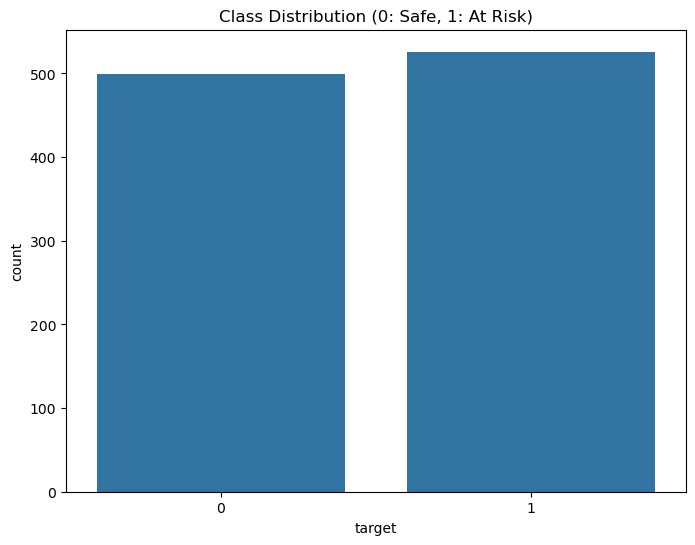

In [23]:
# Target distribution
plt.figure(figsize=(8,6))
sns.countplot(x='target', data=df)
plt.title('Class Distribution (0: Safe, 1: At Risk)')
plt.show()

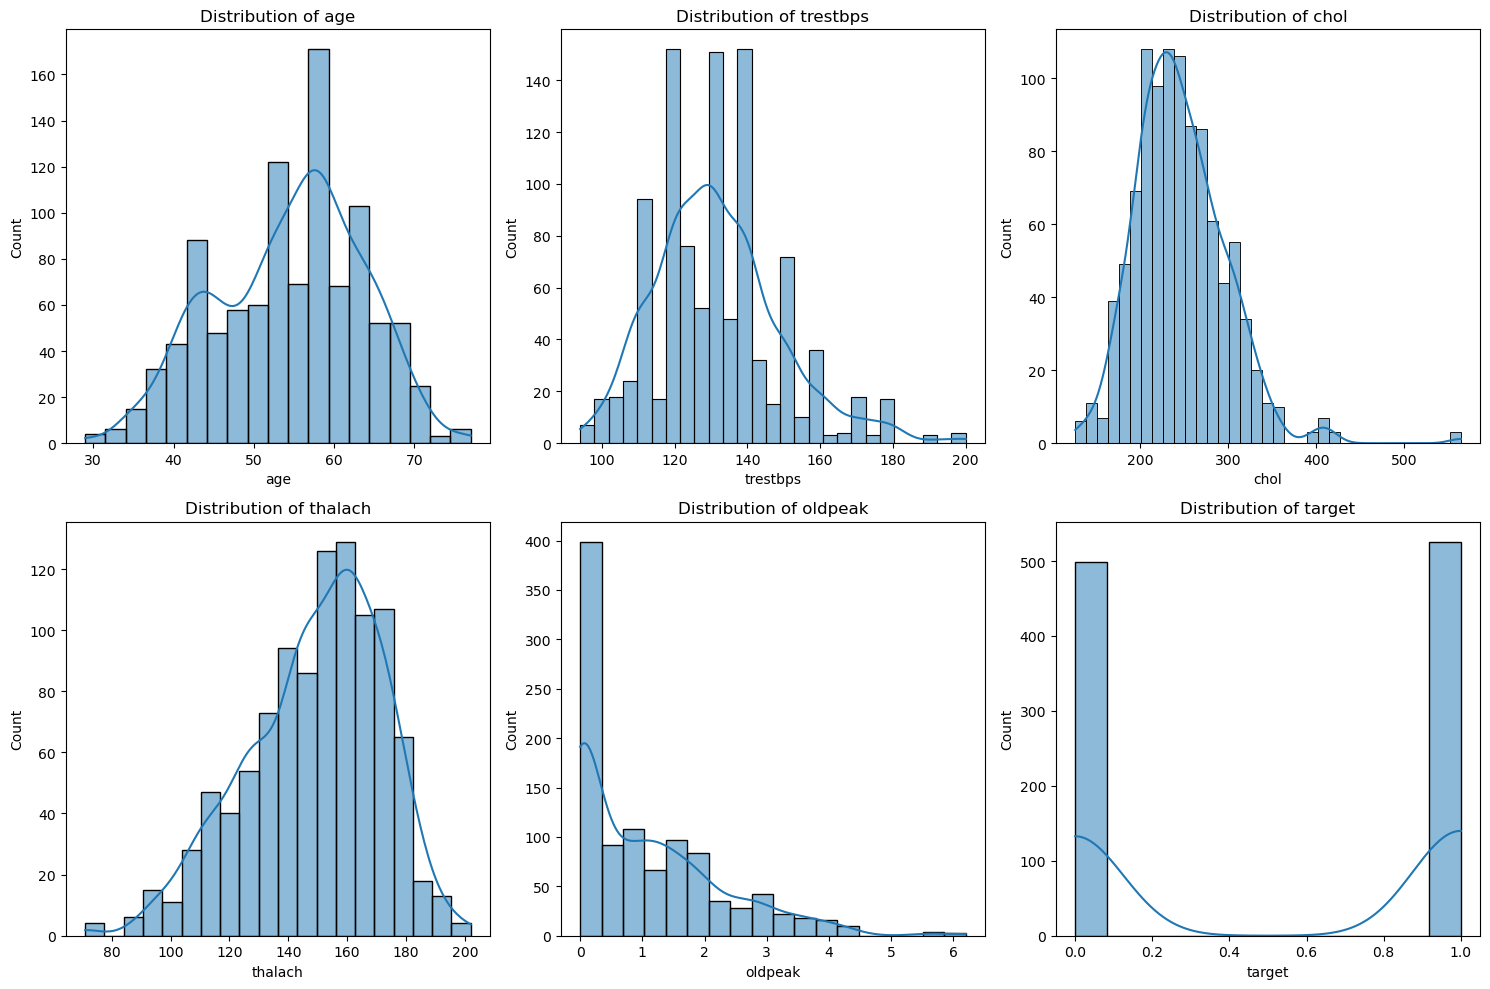

In [26]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak','target']
plt.figure(figsize=(15,10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2,3,i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

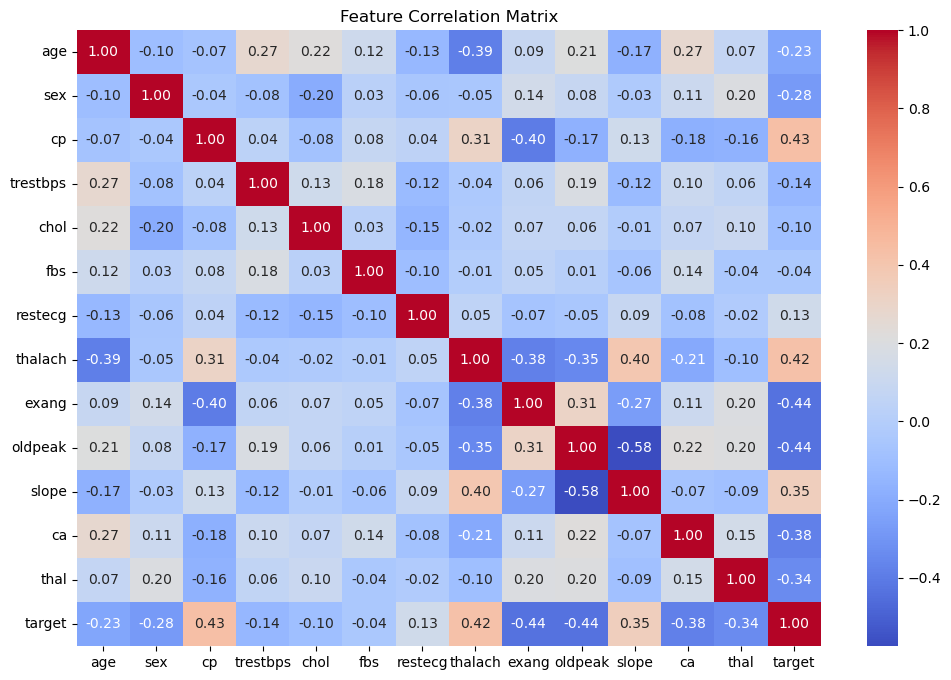

In [11]:
# ### Predictive Modeling

In [12]:
# Data preprocessing
X = df.drop('target', axis=1)
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [13]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:

# Initialize models with hyperparameter grids
models = {
    'XGBoost': {
        'model': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        'params': {
            'learning_rate': [0.01, 0.1],
            'max_depth': [3, 5],
            'n_estimators': [100, 200]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [100, 200],
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5]
        }
    }
}

In [15]:

# Model training and evaluation
best_model = None
best_score = 0

for name, config in models.items():
    print(f"\nTraining {name}...")
    grid_search = GridSearchCV(
        config['model'], 
        config['params'], 
        cv=5, 
        scoring='accuracy'
    )
    grid_search.fit(X_train_scaled, y_train)
    
    model = grid_search.best_estimator_
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    
    if accuracy > best_score:
        best_score = accuracy
        best_model = model


Training XGBoost...
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Test Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


Training RandomForest...
Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [16]:
# ### Model Evaluation Visualization

<Figure size 800x600 with 0 Axes>

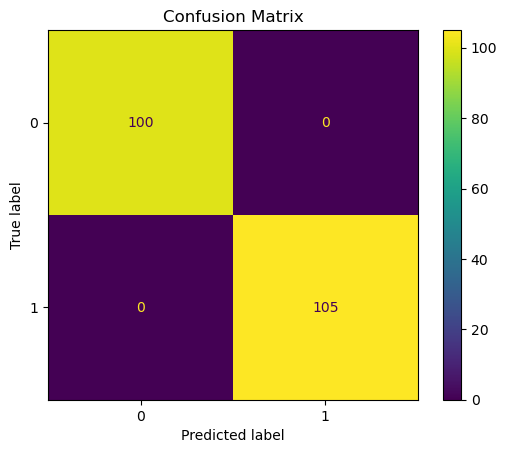

In [17]:
# Confusion Matrix
plt.figure(figsize=(8,6))
ConfusionMatrixDisplay.from_estimator(best_model, X_test_scaled, y_test)
plt.title('Confusion Matrix')
plt.show()

<Figure size 800x600 with 0 Axes>

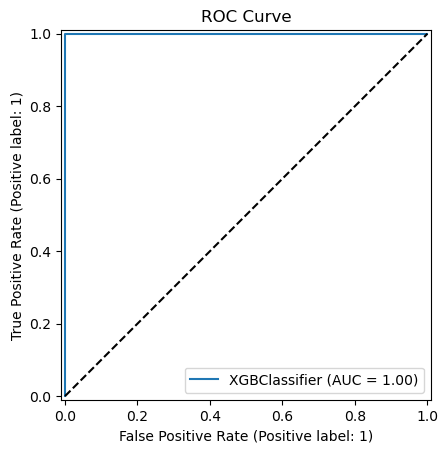

In [18]:
# ROC Curve
plt.figure(figsize=(8,6))
RocCurveDisplay.from_estimator(best_model, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.show()

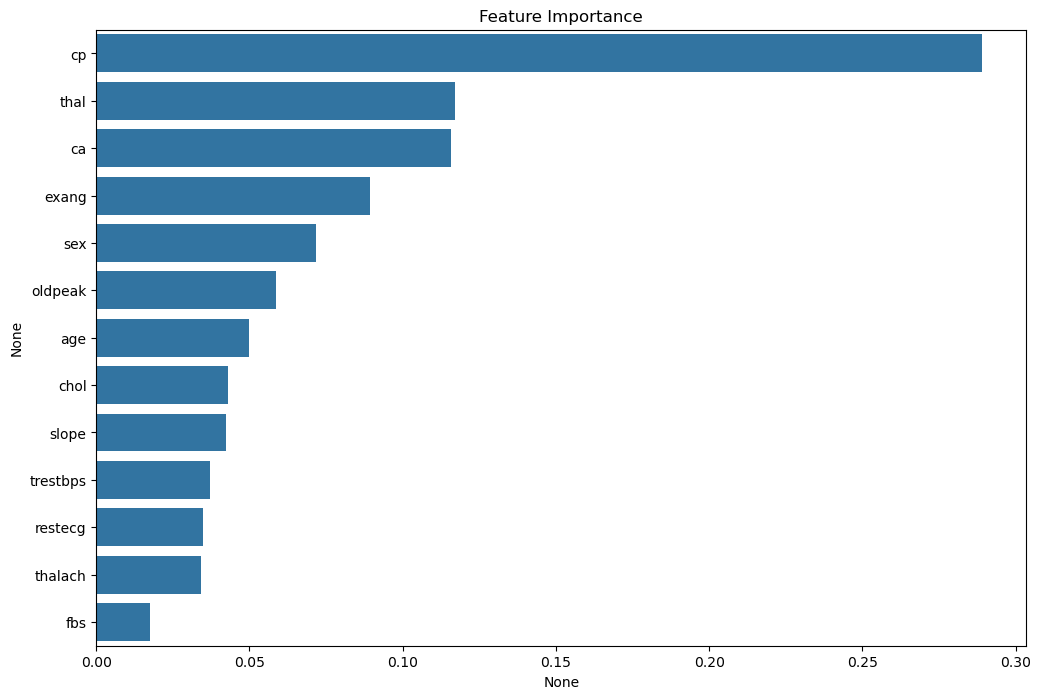

In [19]:
# Feature Importance
if hasattr(best_model, 'feature_importances_'):
    plt.figure(figsize=(12,8))
    feature_importance = pd.Series(
        best_model.feature_importances_, 
        index=X.columns
    ).sort_values(ascending=False)
    sns.barplot(x=feature_importance, y=feature_importance.index)
    plt.title('Feature Importance')
    plt.show()

In [20]:
# ### Prediction Example
# Sample prediction from test set
sample = X_test_scaled[0].reshape(1, -1)
prediction = best_model.predict(sample)
prob = best_model.predict_proba(sample)[0]
print(f"\nSample Prediction: {'At Risk' if prediction[0] == 1 else 'Safe'}")
print(f"Probability: {prob[prediction[0]]:.2%} confidence")


Sample Prediction: Safe
Probability: 98.64% confidence
